In [1]:
import os
from PIL import Image
import numpy as np
folder_path = r'All_real_image - Copy'
image_size = (16, 16)
image_arrays = []
image_size = (16, 16)

for filename in os.listdir(folder_path):
    if filename.endswith(".tif"):
        img_path = os.path.join(folder_path, filename)
        
        img = Image.open(img_path)
        
        img = img.resize(image_size)
        
        img_array = np.array(img)
        
        
        if img_array.ndim == 2:
            img_array = img_array[..., np.newaxis]
        
        
        image_arrays.append(img_array)

load_data = np.array(image_arrays).astype('float32')

print("Data shape:", load_data.shape)


Data shape: (5750, 16, 16, 1)


In [2]:
load_data.shape

(5750, 16, 16, 1)

In [3]:
load_data

array([[[[0.12841737],
         [0.13117723],
         [0.11115643],
         ...,
         [0.11867584],
         [0.11921079],
         [0.12636682]],

        [[0.12603186],
         [0.12836802],
         [0.10886186],
         ...,
         [0.1216401 ],
         [0.12225835],
         [0.13279547]],

        [[0.1260647 ],
         [0.10723534],
         [0.11342487],
         ...,
         [0.1330605 ],
         [0.12336928],
         [0.13457018]],

        ...,

        [[0.10435127],
         [0.10631341],
         [0.11044784],
         ...,
         [0.12130516],
         [0.11416102],
         [0.1127842 ]],

        [[0.10221943],
         [0.10546513],
         [0.11121994],
         ...,
         [0.11632817],
         [0.11337595],
         [0.1165085 ]],

        [[0.10122424],
         [0.10443298],
         [0.10586414],
         ...,
         [0.10584632],
         [0.10745312],
         [0.10872801]]],


       [[[0.25658444],
         [0.2572814 ],
         [0.25

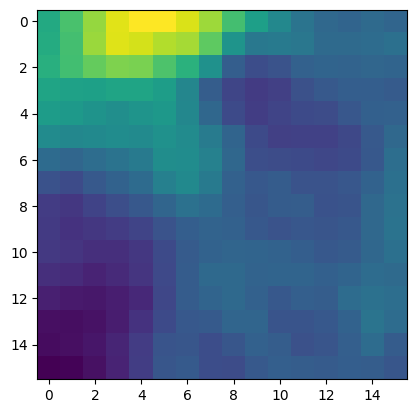

In [4]:
import matplotlib.pyplot as plt

plt.imshow(load_data[999])

In [5]:
from sklearn.model_selection import train_test_split
trainX, testX = train_test_split(load_data, test_size=0.2, random_state=42)

In [6]:

trainX.shape

(4600, 16, 16, 1)

In [7]:
def load_real_samples():
    x = trainX.astype('float32')
    x = (x-127.5)/127.5
    return x

In [8]:
dataset = load_real_samples()

In [9]:
def generate_real_samples(dataset,n_samples):
    ix = np.random.randint(0,dataset.shape[0],n_samples)
    x=dataset[ix]
    y=np.ones((n_samples,1))
    return x,y

# Define discriminatormodel

In [10]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Conv2D,Flatten,Dropout,LeakyReLU,Activation
import numpy as np
from tensorflow.keras.activations import gelu

2024-09-13 15:32:00.976894: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-13 15:32:00.983102: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-13 15:32:00.990835: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-13 15:32:00.993177: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-13 15:32:00.999565: I tensorflow/core/platform/cpu_feature_guar

In [11]:
# def generate_fake_samples(n_samples):
#     x=np.random.rand(16*16*3*n_samples)
#     x=-1+x*2
#     x = x.reshape((n_samples,16,16,3))
#     y=np.zeros((n_samples,0))
#     return x,y
    

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, BatchNormalization, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

def define_discriminator(in_shape=(16,16,1)):
    model = Sequential()
    
    
    model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    
    
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
  
    model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten())
    model.add(Dropout(0.4))
    
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Dense(1, activation='sigmoid'))
    
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [13]:
d_model =  define_discriminator()
d_model.summary()

/home/optisarlab/anaconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1726221721.599410  136007 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-13 15:32:01.615862: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467,841 (9.41 MB)

 Trainable params: 2,467,841 (9.41 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Conv2D,Flatten,Dropout,LeakyReLU,Reshape,Conv2DTranspose,Activation,BatchNormalization
import numpy as np
from tensorflow.keras.activations import gelu

In [15]:
def define_generator():
    model = Sequential()

    model.add(Conv2D(64, kernel_size=3, padding='same', input_shape=(16, 16, 1)))
    model.add(Activation(gelu))

    model.add(Flatten())
    model.add(Dense(256, activation=gelu))

    model.add(Reshape((16, 16, 1)))
    
    model.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

    return model

In [16]:

g_model=define_generator()
g_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 16, 16, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 1)      │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,195,210 (16.00 MB)

 Trainable params: 4,195,210 (16.00 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
import os
from PIL import Image
import numpy as np

folder_path = r'Modified image - Copy'
image_size = (16, 16)
image_arrays = []

for filename in os.listdir(folder_path):
    if filename.endswith(".tif"):
        img_path = os.path.join(folder_path, filename)
        
        img = Image.open(img_path)
        
        img = img.resize(image_size)
        
        img_array = np.array(img)
        
        
        if img_array.ndim == 2:
            img_array = img_array[..., np.newaxis]
        
        
        image_arrays.append(img_array)

modified_data= np.array(image_arrays).astype('float32')

modified_data= (modified_data - 127.5) / 127.5

print("Data shape:", modified_data.shape)


Data shape: (4600, 16, 16, 1)


In [18]:
modified_data.shape

(4600, 16, 16, 1)

In [19]:
modified_data[0,:,:,0]

array([[-0.9989928 , -0.99897116, -8.835294  , -0.9991541 , -8.835294  ,
        -0.999077  , -0.999068  , -8.835294  , -0.99904543, -0.99905837,
        -0.99904466, -0.99902683, -8.835294  , -0.9990692 , -0.99906504,
        -0.9990089 ],
       [-0.9990115 , -8.835294  , -0.99914616, -0.999168  , -8.835294  ,
        -0.99905735, -8.835294  , -8.835294  , -0.9990854 , -0.9990524 ,
        -0.999031  , -8.835294  , -0.99906677, -0.9990459 , -0.9990411 ,
        -0.99895847],
       [-0.9990112 , -0.9991589 , -0.9991104 , -8.835294  , -0.9987687 ,
        -8.835294  , -0.99902534, -0.99905187, -0.99906015, -0.99904835,
        -8.835294  , -8.835294  , -8.835294  , -8.835294  , -0.99903244,
        -8.835294  ],
       [-0.99929667, -8.835294  , -0.99915016, -0.9989935 , -0.9989009 ,
        -0.99888515, -0.9988922 , -0.9989983 , -8.835294  , -0.99893636,
        -0.99892724, -0.99889916, -0.99882853, -0.99885905, -8.835294  ,
        -0.9989748 ],
       [-8.835294  , -0.9991304 , -0

In [20]:
modified_data1  = modified_data


In [21]:
md=g_model.predict(modified_data1)

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


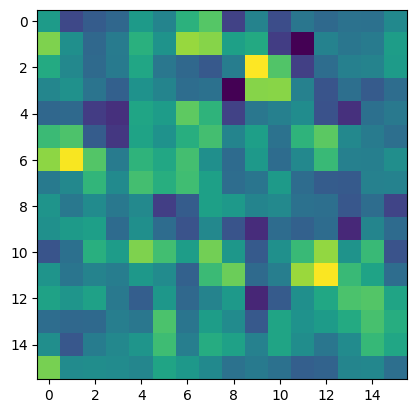

In [22]:
plt.imshow(md[0,:,:,0])

In [23]:
def generate_fake_samples(g_model, modified_data, n_samples):
    if n_samples > len(modified_data):
        raise ValueError("Batch size exceeds the number of available images.")
    indices = np.random.randint(0, len(modified_data), n_samples)
    input_images = modified_data[indices]
    fake_images = g_model.predict(input_images)
    
    return fake_images

In [24]:
def generate_point(modified_data, n_samples):
    num_images = modified_data.shape[0]
    indices = np.random.choice(num_images, n_samples)
    sampled_points = modified_data[indices]

    return sampled_points

In [25]:
g_model = define_generator()
n_samples =32
x = generate_fake_samples(g_model,modified_data, n_samples)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [26]:
def define_gan(g_model,d_model):
    d_model.trainable=False
    model=Sequential()
    model.add(g_model)
    model.add(d_model)
    opt=Adam(learning_rate=0.0002,beta_1=0.5)
    model.compile(loss="binary_crossentropy",optimizer=opt)
    return model

In [27]:
gan_model= define_gan(g_model,d_model)

In [28]:
gan_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 16, 16, 1)      │     4,195,210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 1)              │     2,467,841 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,663,051 (25.42 MB)

 Trainable params: 4,195,210 (16.00 MB)

 Non-trainable params: 2,467,841 (9.41 MB)

In [29]:
def train(g_model, d_model, gan_model, dataset, modified_data, n_epochs=10,n_batch=40):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch_size = int(n_batch / 2)

    for i in range(n_epochs): 
        for j in range(bat_per_epo):
            
            X_real, y_real = generate_real_samples(dataset, half_batch_size)
            d_loss1 = d_model.train_on_batch(X_real, y_real)
            
            X_fake = generate_fake_samples(g_model, modified_data, half_batch_size)
            y_fake = np.zeros((half_batch_size, 1))
            d_loss2 = d_model.train_on_batch(X_fake, y_fake)
            
            X_gan = generate_point(modified_data, n_batch)
     
            y_gan = np.ones((n_batch, 1))
            g_loss = gan_model.train_on_batch(X_gan, y_gan)

            d_loss1_value = d_loss1[0] if isinstance(d_loss1, list) else d_loss1
            d_loss2_value = d_loss2[0] if isinstance(d_loss2, list) else d_loss2
            g_loss_value = g_loss[0] if isinstance(g_loss, list) else g_loss
            
            print('%d,%d/%d,d1=%.3f,d2=%.3f,g=%.3f' % (i+1, j+1, bat_per_epo, d_loss1_value, d_loss2_value, g_loss_value))
        
        if (i + 1) % 49 == 0:
            summarize_performance(i, g_model, d_model, dataset,modified_data)

In [30]:
def summarize_performance(epoch, g_model, d_model, dataset, modified_data, n_samples=50):
    X_real, y_real = generate_real_samples(dataset, n_samples)
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    
    X_fake, y_fake = generate_fake_samples(g_model, modified_data, n_samples)
    _, acc_fake = d_model.evaluate(X_fake, y_fake, verbose=0)
    
    print(f'>Accuracy real: {acc_real*100:.0f}%, fake: {acc_fake*100:.0f}%')
    save_plot(X_fake, epoch)
    filename = os.path.join(r'C:\Users\OptiSAR\Desktop\gan\save_image', f"generate_model_{epoch+1:03d}.h5")
    g_model.save(filename)

In [31]:
from matplotlib import pyplot
save_dir=r'C:\Users\OptiSAR\Desktop\gan\save image'
def save_plot(examples, epoch, n=7, save_dir=save_dir):
    examples = (examples + 1) / 2.0
    if not os.path.exist(save_dir):
        os.makedirs(save_dir)
    for i in range(n * n):
        pyplot.subplot(n, n, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(examples[i])
    filename = os.path.join(save_dir, 'generated_plot_e%03d.tif' % (epoch+1))
    pyplot.savefig(filename, format='tif')
    pyplot.close()

In [32]:
train(g_model, d_model, gan_model, dataset, modified_data, n_epochs=10, n_batch=40)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/home/optisarlab/anaconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1,1/115,d1=0.684,d2=0.688,g=0.688
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


2024-09-13 15:32:03.784341: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:966] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'StatefulPartitionedCall/gradient_tape/sequential_3_1/sequential_1/leaky_re_lu_2_1/LeakyRelu/LeakyReluGrad' exist for missing node 'StatefulPartitionedCall/sequential_3_1/sequential_1/conv2d_2_1/add'.


1,2/115,d1=0.682,d2=0.689,g=0.689
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1,3/115,d1=0.687,d2=0.694,g=0.694
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1,4/115,d1=0.692,d2=0.699,g=0.699
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1,5/115,d1=0.697,d2=0.703,g=0.703
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1,6/115,d1=0.701,d2=0.707,g=0.707
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1,7/115,d1=0.704,d2=0.709,g=0.709
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1,8/115,d1=0.707,d2=0.711,g=0.711
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1,9/115,d1=0.710,d2=0.714,g=0.714
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1,10/115,d1=0.713,d2=0.717,g=0.717
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1,11/115,d1=0.715,d2=0.718,g=0.718
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1,12/115,d1=0.717,d2=0.721,g=0.721
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1,13/115,d1=0.719,d2=0.722,g=0.722
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1,14/115,d1=0.720,d2=0.723,g=0.723
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1,15/115,d1=0.721,d2=0.724,g=0.724
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

2024-09-13 15:33:03.917234: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:966] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'StatefulPartitionedCall/gradient_tape/sequential_3_1/sequential_1/leaky_re_lu_2_1/LeakyRelu/LeakyReluGrad' exist for missing node 'StatefulPartitionedCall/sequential_3_1/sequential_1/conv2d_2_1/add'.


3,60/115,d1=0.753,d2=0.753,g=0.753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3,61/115,d1=0.753,d2=0.753,g=0.753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3,62/115,d1=0.753,d2=0.753,g=0.753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3,63/115,d1=0.753,d2=0.753,g=0.753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3,64/115,d1=0.753,d2=0.753,g=0.753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3,65/115,d1=0.753,d2=0.753,g=0.753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3,66/115,d1=0.753,d2=0.753,g=0.753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3,67/115,d1=0.753,d2=0.753,g=0.753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
3,68/115,d1=0.753,d2=0.753,g=0.753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3,69/115,d1=0.753,d2=0.753,g=0.753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3,70/115,d1=0.753,d2=0.753,g=0.753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3,71/115,d1=0.753,d2=0.753,g=0.753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3,72/115,d1=0.753,d2=0.753,g=0.753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3,73/115,d1=0.753,d2=0.753,g=0.753
1/1 ━━━━━━━━━━━━━

2024-09-13 15:34:04.128077: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:966] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'StatefulPartitionedCall/gradient_tape/sequential_3_1/sequential_1/leaky_re_lu_2_1/LeakyRelu/LeakyReluGrad' exist for missing node 'StatefulPartitionedCall/sequential_3_1/sequential_1/conv2d_2_1/add'.


5,67/115,d1=0.755,d2=0.755,g=0.755
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5,68/115,d1=0.755,d2=0.755,g=0.755
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5,69/115,d1=0.755,d2=0.755,g=0.755
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5,70/115,d1=0.755,d2=0.755,g=0.755
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5,71/115,d1=0.755,d2=0.755,g=0.755
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5,72/115,d1=0.755,d2=0.755,g=0.755
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
5,73/115,d1=0.755,d2=0.755,g=0.755
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5,74/115,d1=0.755,d2=0.755,g=0.755
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5,75/115,d1=0.755,d2=0.755,g=0.755
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5,76/115,d1=0.755,d2=0.755,g=0.755
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5,77/115,d1=0.755,d2=0.755,g=0.755
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5,78/115,d1=0.755,d2=0.755,g=0.755
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5,79/115,d1=0.755,d2=0.755,g=0.755
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5,80/115,d1=0.755,d2=0.755,g=0.755
1/1 ━━━━━━━━━━━━━

2024-09-13 15:35:04.214036: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:966] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'StatefulPartitionedCall/gradient_tape/sequential_3_1/sequential_1/leaky_re_lu_2_1/LeakyRelu/LeakyReluGrad' exist for missing node 'StatefulPartitionedCall/sequential_3_1/sequential_1/conv2d_2_1/add'.


7,48/115,d1=0.756,d2=0.756,g=0.756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7,49/115,d1=0.756,d2=0.756,g=0.756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7,50/115,d1=0.756,d2=0.756,g=0.756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7,51/115,d1=0.756,d2=0.756,g=0.756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7,52/115,d1=0.756,d2=0.756,g=0.756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7,53/115,d1=0.756,d2=0.756,g=0.756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7,54/115,d1=0.756,d2=0.756,g=0.756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7,55/115,d1=0.756,d2=0.756,g=0.756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7,56/115,d1=0.756,d2=0.756,g=0.756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7,57/115,d1=0.756,d2=0.756,g=0.756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7,58/115,d1=0.756,d2=0.756,g=0.756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7,59/115,d1=0.756,d2=0.756,g=0.756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7,60/115,d1=0.756,d2=0.756,g=0.756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7,61/115,d1=0.756,d2=0.756,g=0.756
1/1 ━━━━━━━━━━━━

2024-09-13 15:36:04.490580: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:966] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'StatefulPartitionedCall/gradient_tape/sequential_3_1/sequential_1/leaky_re_lu_2_1/LeakyRelu/LeakyReluGrad' exist for missing node 'StatefulPartitionedCall/sequential_3_1/sequential_1/conv2d_2_1/add'.


9,11/115,d1=0.756,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
9,12/115,d1=0.756,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
9,13/115,d1=0.756,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
9,14/115,d1=0.756,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
9,15/115,d1=0.756,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
9,16/115,d1=0.756,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
9,17/115,d1=0.756,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
9,18/115,d1=0.756,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
9,19/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
9,20/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
9,21/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
9,22/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
9,23/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
9,24/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━

2024-09-13 15:37:04.605167: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:966] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'StatefulPartitionedCall/gradient_tape/sequential_3_1/sequential_1/leaky_re_lu_2_1/LeakyRelu/LeakyReluGrad' exist for missing node 'StatefulPartitionedCall/sequential_3_1/sequential_1/conv2d_2_1/add'.


10,74/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
10,75/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10,76/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10,77/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10,78/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
10,79/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10,80/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10,81/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
10,82/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10,83/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10,84/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10,85/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
10,86/115,d1=0.757,d2=0.757,g=0.757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10,87/115,d1=0.757,d2=0.757,g=0.757
1/

In [39]:
x1= modified_data[0:1]

In [40]:
im_out = g_model.predict(x1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


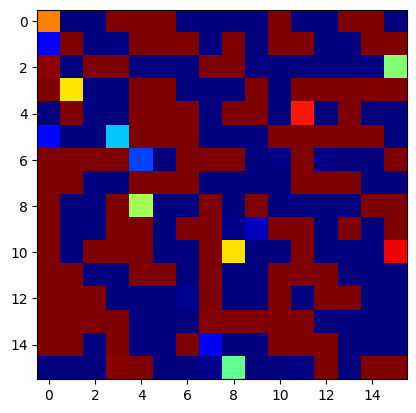

In [41]:
output = plt.imshow(im_out[0,:,:,0], cmap = 'jet')